In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm

ff1.Cache.enable_cache('2023Monaco') 
fp = ff1.get_session(2023, 'Monaco', 'FP1')
fp_laps = fp.load_laps(with_telemetry=True)
fp.load()

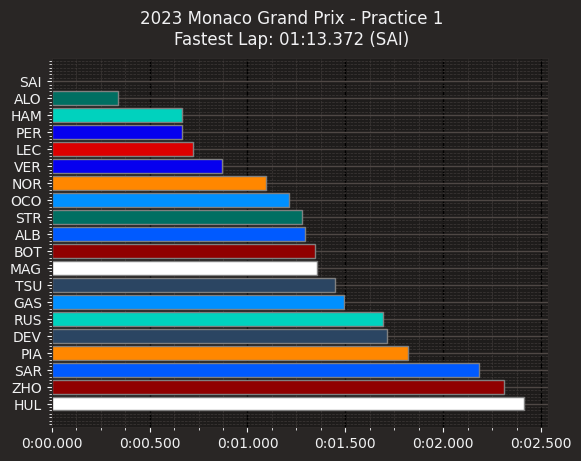

In [2]:
drivers = pd.unique(fp.laps['Driver'])
best_laps = list()
for driver in drivers:
    best_laps.append(fp.laps.pick_driver(driver).pick_fastest())
fastest_laps = Laps(best_laps).sort_values(by='LapTime').reset_index(drop=True)

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

team_colors = list()
for index, lap in fastest_laps.iterlaps():
        color = ff1.plotting.team_color(lap['Team'])
        team_colors.append(color)
        
ff1.plotting.setup_mpl()
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{fp.event.year} {fp.event.EventName} - {fp.name}\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()

# Telemetry

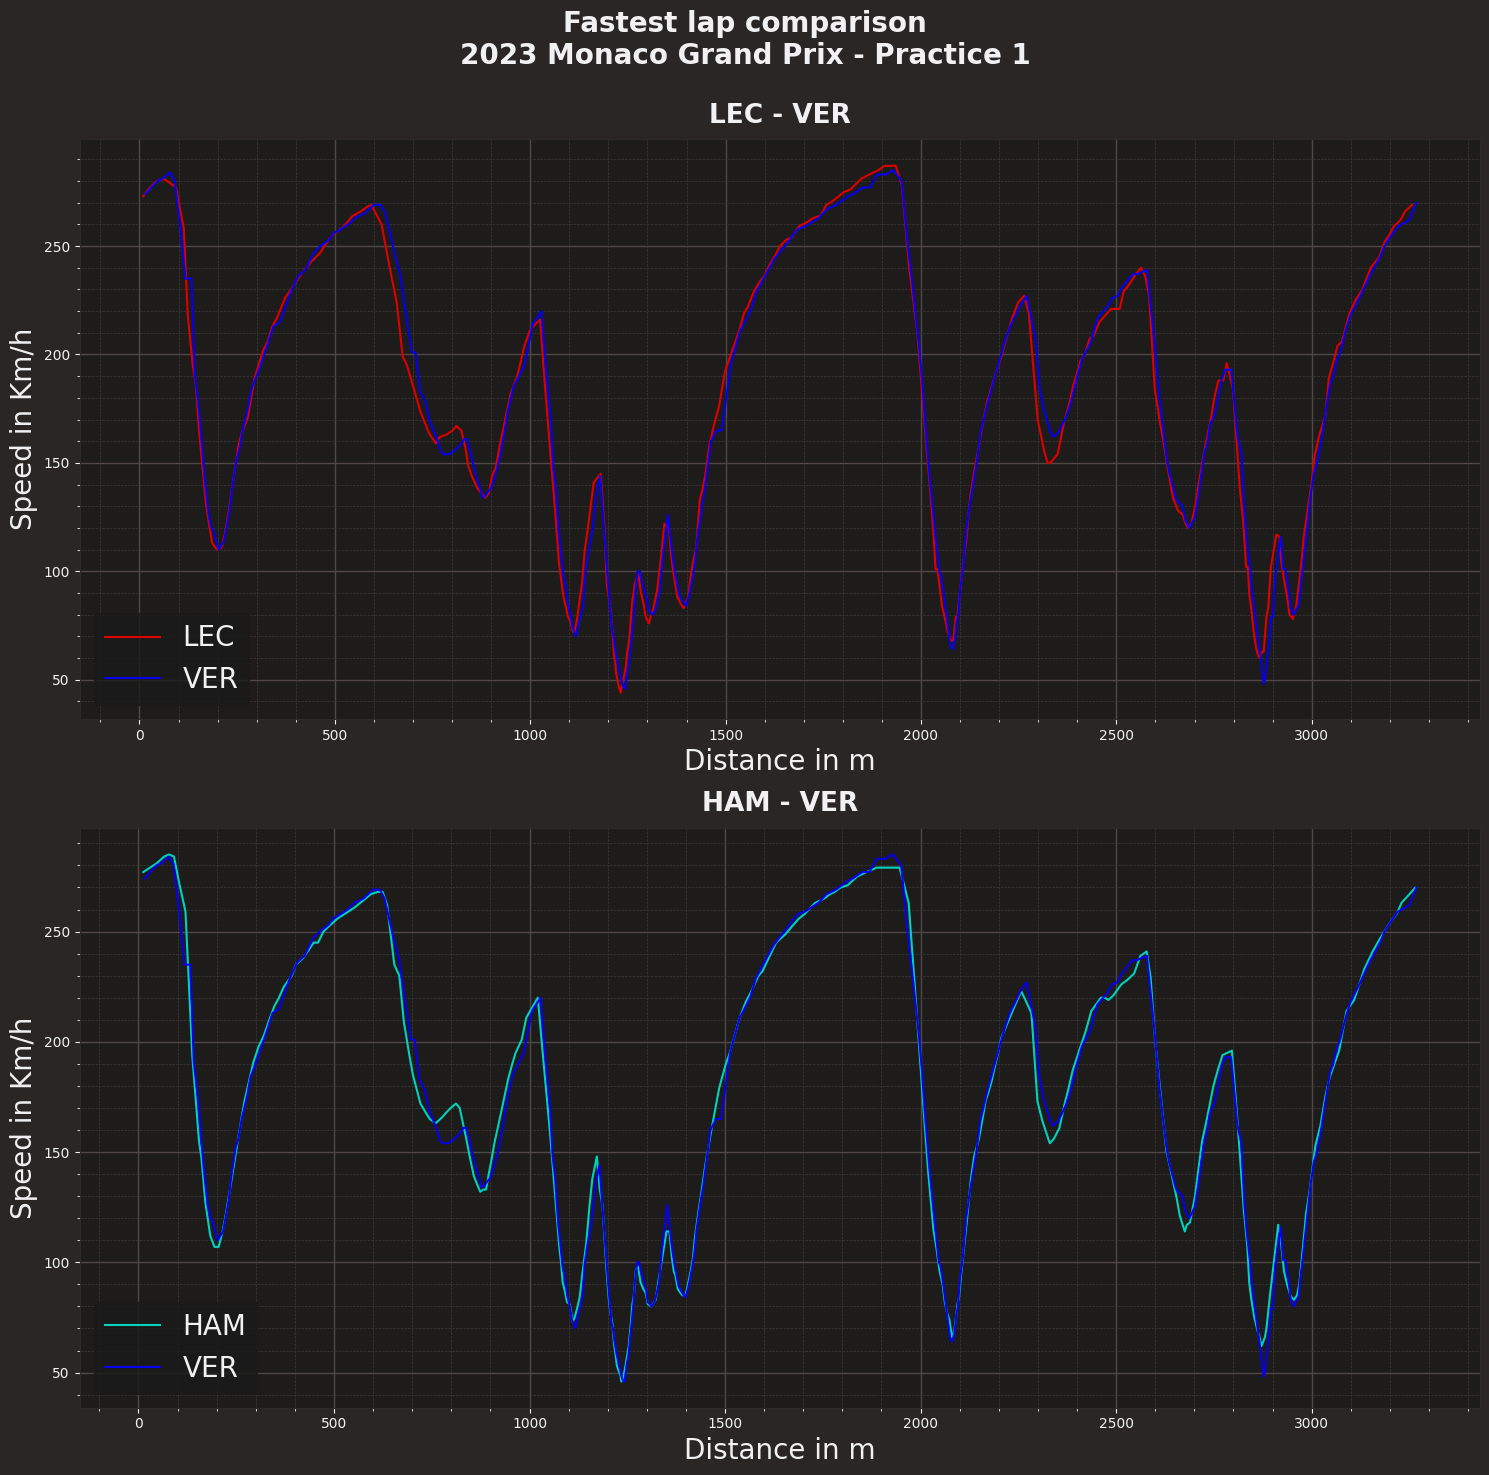

In [3]:
import matplotlib.pyplot as plt
import fastf1.plotting

ff1.plotting.setup_mpl()

lec_lap = fp.laps.pick_driver('LEC').pick_fastest()
ver_lap = fp.laps.pick_driver('VER').pick_fastest()
alo_lap = fp.laps.pick_driver('HAM').pick_fastest()

lec_tel = lec_lap.get_car_data().add_distance()
ver_tel = ver_lap.get_car_data().add_distance()
alo_tel = alo_lap.get_car_data().add_distance()

ferr_color = ff1.plotting.team_color('FER')
rbr_color = ff1.plotting.team_color('RBR')
aston_color = ff1.plotting.team_color('MER')

fig1, ax1 = plt.subplots(2)
fig1.set_figheight(15)
fig1.set_figwidth(15)
ax1[0].plot(lec_tel['Distance'], lec_tel['Speed'], color = ferr_color, label = 'LEC')
ax1[0].plot(ver_tel['Distance'], ver_tel['Speed'], color = rbr_color, label = 'VER')

ax1[0].set_xlabel('Distance in m', size=20)
ax1[0].set_ylabel('Speed in Km/h', size=20)

ax1[0].legend(prop={'size': 20})
ax1[0].set_title(f"{lec_lap['Driver']} - {ver_lap['Driver']}", fontweight = "bold", ha='center')


ax1[1].plot(alo_tel['Distance'], alo_tel['Speed'], color = aston_color, label = 'HAM')
ax1[1].plot(ver_tel['Distance'], ver_tel['Speed'], color = rbr_color, label = 'VER')

ax1[1].set_xlabel('Distance in m', size=20)
ax1[1].set_ylabel('Speed in Km/h', size=20)

ax1[1].legend(prop={'size': 20})
ax1[1].set_title(f"{alo_lap['Driver']} - {ver_lap['Driver']}", fontweight = "bold", ha='center')

fig1.suptitle(f"Fastest lap comparison\n"f"{fp.event.year} {fp.event.EventName} - {fp.name}\n", size = 20, weight='bold', ha='center')
#plt.subplots_adjust(top=0.85)
fig1.tight_layout()

plt.show()


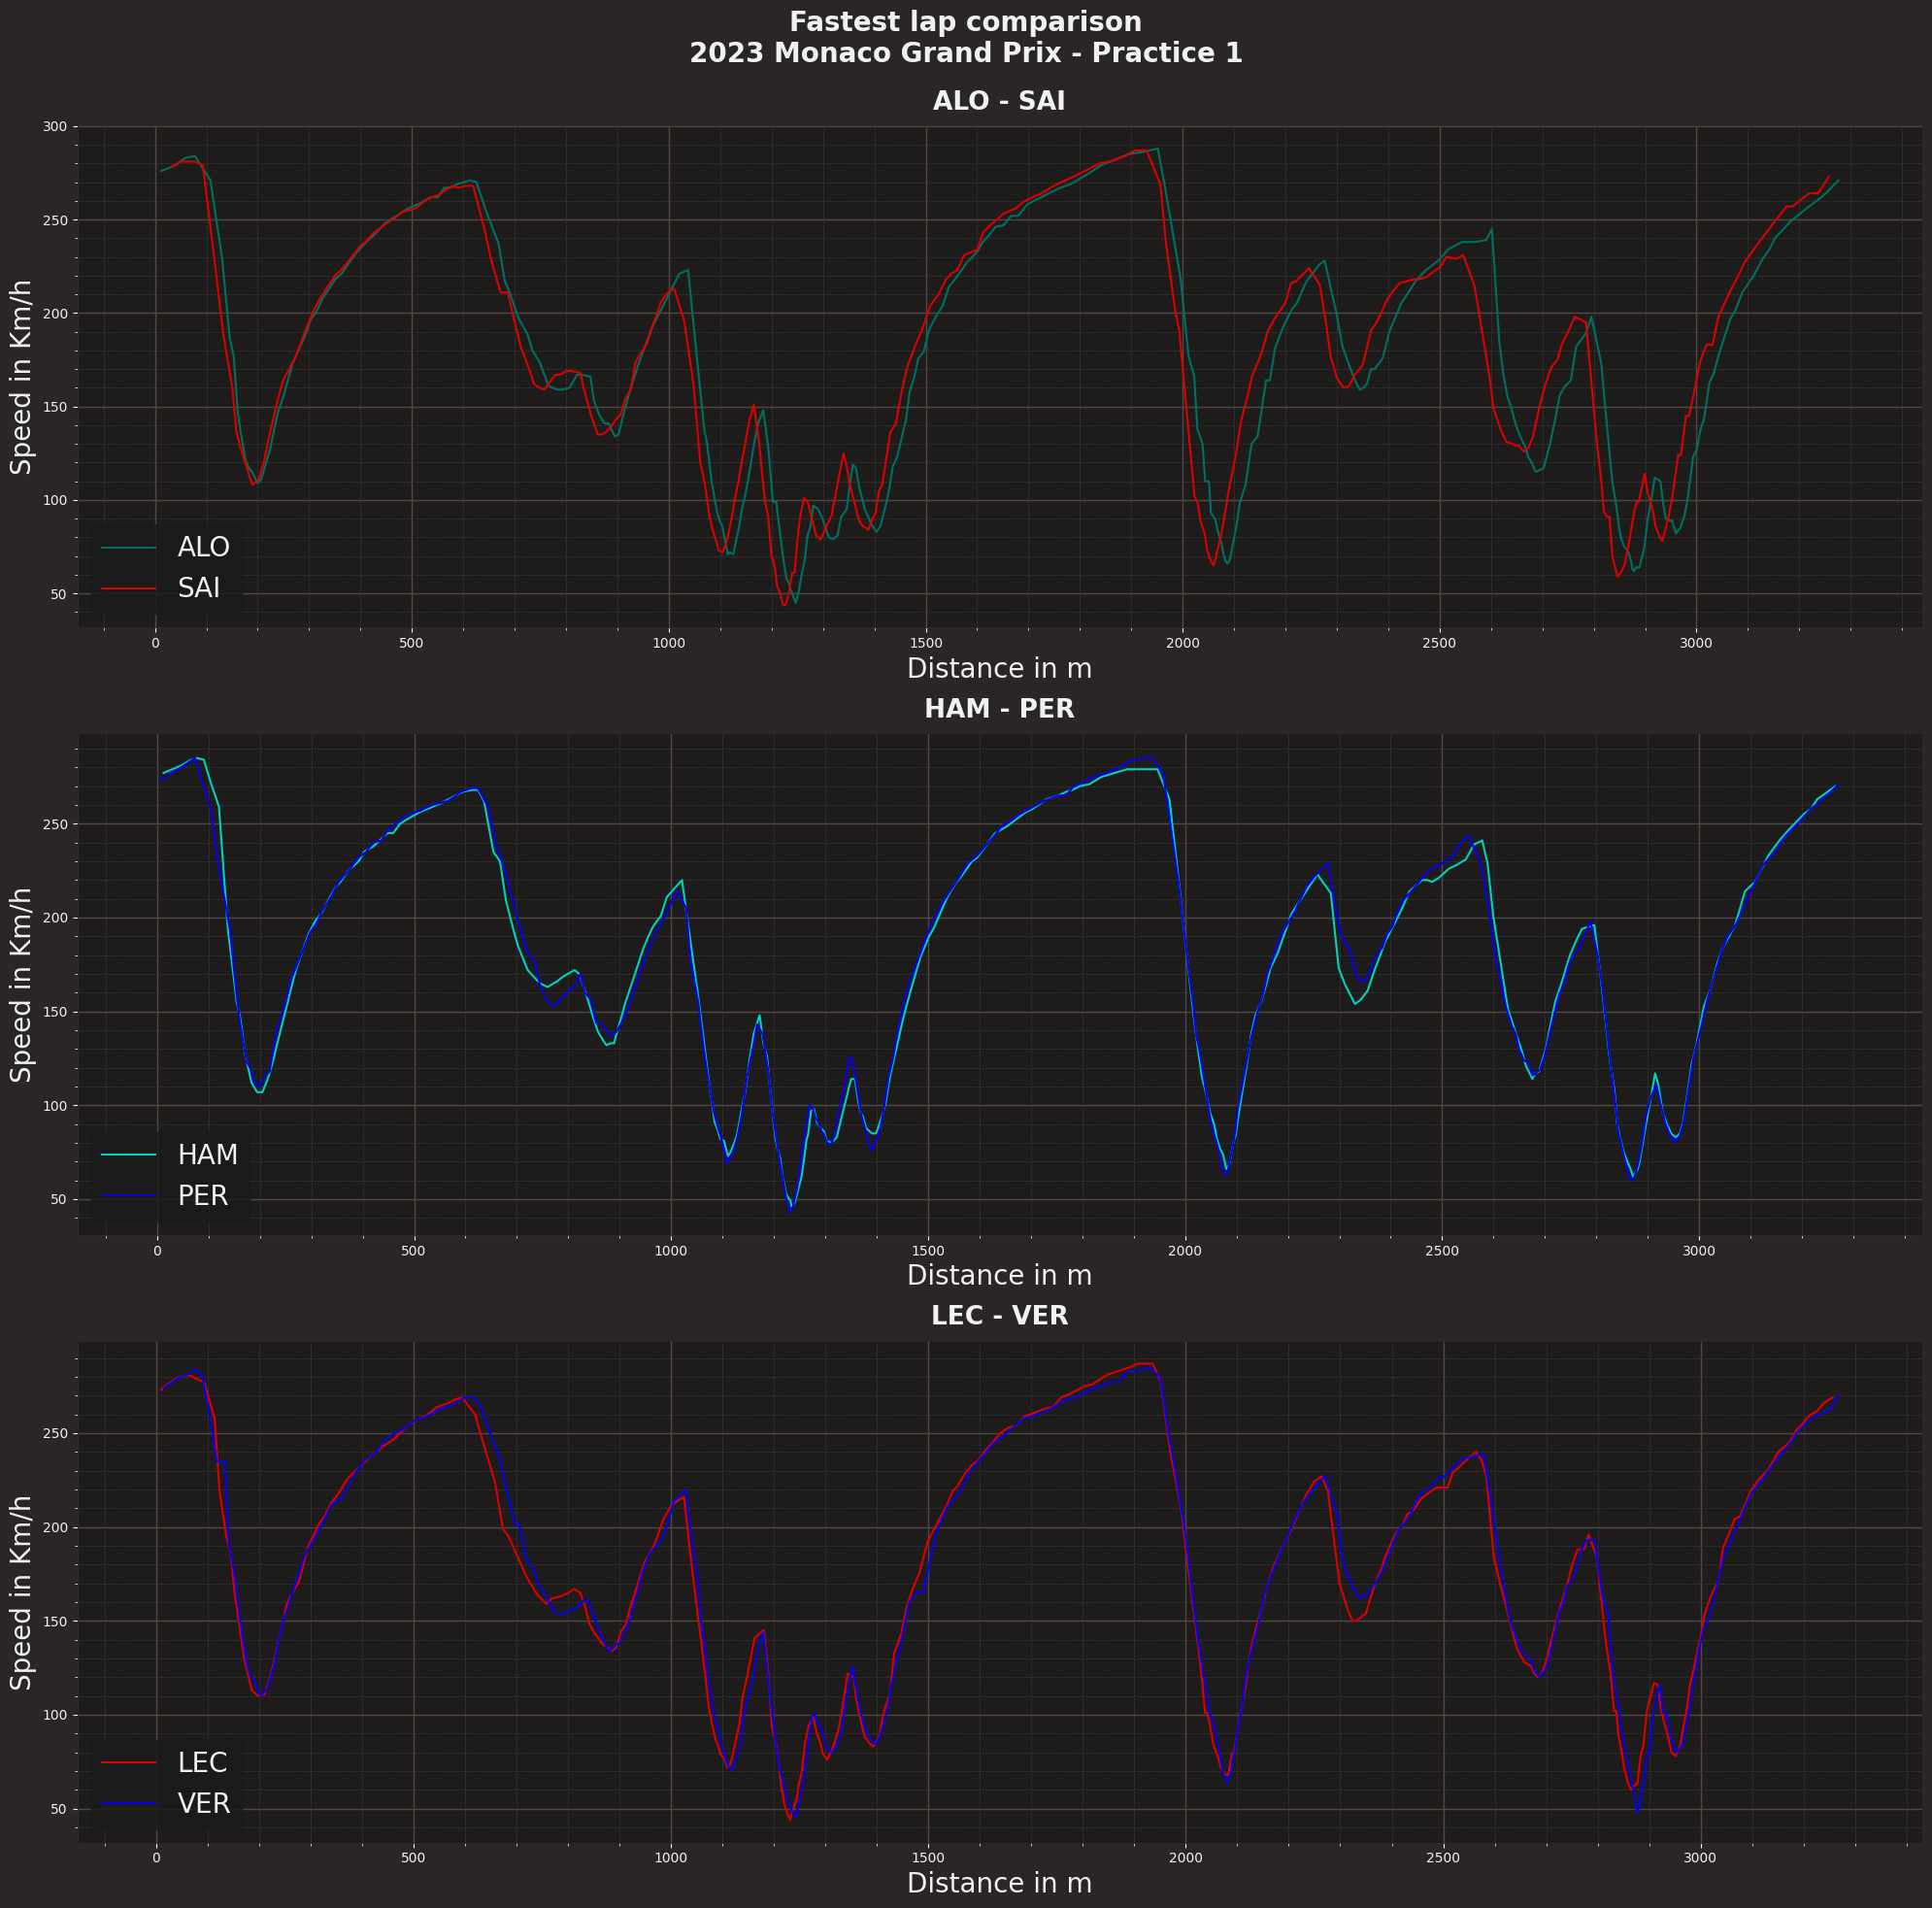

In [6]:
import matplotlib.pyplot as plt
import fastf1.plotting

ff1.plotting.setup_mpl()

lec_lap = fp.laps.pick_driver('LEC').pick_fastest()
ver_lap = fp.laps.pick_driver('VER').pick_fastest()
sai_lap = fp.laps.pick_driver('SAI').pick_fastest()
per_lap = fp.laps.pick_driver('PER').pick_fastest()
ham_lap = fp.laps.pick_driver('HAM').pick_fastest()
rus_lap = fp.laps.pick_driver('RUS').pick_fastest()
alo_lap = fp.laps.pick_driver('ALO').pick_fastest()

lec_tel = lec_lap.get_car_data().add_distance()
ver_tel = ver_lap.get_car_data().add_distance()
sai_tel = sai_lap.get_car_data().add_distance()
per_tel = per_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()
rus_tel = rus_lap.get_car_data().add_distance()
alo_tel = alo_lap.get_car_data().add_distance()

ferr_color = ff1.plotting.team_color('FER')
rbr_color = ff1.plotting.team_color('RBR')
mer_color = ff1.plotting.team_color('MER')
aston_color = ff1.plotting.team_color('AMR')

fig1, ax1 = plt.subplots(3)
fig1.set_figheight(20)
fig1.set_figwidth(20)
ax1[0].plot(alo_tel['Distance'], alo_tel['Speed'], color = aston_color, label = 'ALO')
ax1[0].plot(sai_tel['Distance'], sai_tel['Speed'], color = ferr_color, label = 'SAI')

ax1[0].set_xlabel('Distance in m', size=20)
ax1[0].set_ylabel('Speed in Km/h', size=20)

ax1[0].legend(prop={'size': 20})
ax1[0].set_title(f"{alo_lap['Driver']} - {sai_lap['Driver']}", fontweight = "bold", ha='center')


ax1[1].plot(ham_tel['Distance'], ham_tel['Speed'], color = mer_color, label = 'HAM')
ax1[1].plot(per_tel['Distance'], per_tel['Speed'], color = rbr_color, label = 'PER')

ax1[1].set_xlabel('Distance in m', size=20)
ax1[1].set_ylabel('Speed in Km/h', size=20)

ax1[1].legend(prop={'size': 20})
ax1[1].set_title(f"{ham_lap['Driver']} - {per_lap['Driver']}", fontweight = "bold", ha='center')

fig1.suptitle(f"Fastest lap comparison\n"f"{fp.event['EventName']} {fp.event.year}\n", size = 20, weight='bold', ha='center')



ax1[2].plot(lec_tel['Distance'], lec_tel['Speed'], color = ferr_color, label = 'LEC')
ax1[2].plot(ver_tel['Distance'],ver_tel['Speed'], color = rbr_color, label = 'VER')

ax1[2].set_xlabel('Distance in m', size=20)
ax1[2].set_ylabel('Speed in Km/h', size=20)

ax1[2].legend(prop={'size': 20})
ax1[2].set_title(f"{lec_lap['Driver']} - {ver_lap['Driver']}", fontweight = "bold", ha='center')

fig1.suptitle(f"Fastest lap comparison\n"f"{fp.event.year} {fp.event.EventName} - {fp.name}\n", size = 20, weight='bold', ha='center')
#plt.subplots_adjust(top=0.85)
fig1.tight_layout()

plt.show()
